<h1 align=center><font size=5>Linear Regression</font></h1>

## Table of contents


- [Linear regression](#LR)
    - [Data example](#LR_data)
    - [Linear regression with analytical solution](#LR_analytical)
    - [Linear regression with gradient descent](#LR_gradient_desc)
    - [Linear regression with scikit-learn](#LR_scikitlearn)
- [Polynomial regression](#poly_reg)
    - [Data example](#poly_data)
    - [Regression with polynomial features transformation](#reg_poly)
    - [Underfitting vs Overfitting](#under_over_fitting)
- [Summary](#summary)

## Linear regression <a id='LR'></a>

### Data example <a id="data"></a>

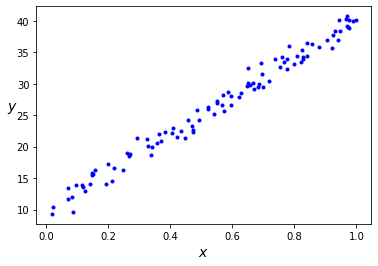

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # Number of data samples

x = np.random.rand(N, 1)
y = 10 + 30 * x + np.random.randn(N, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

### Linear regression with analytical solution <a id="LR_analytical"></a>

In this part, we practice how to solve the linear regression problem using analytical solution that we learned in the lesson. Please follow the following steps:

&#x270d; We want to compute the gradient $\Delta_\theta(J) $ of the loss :
$$
J(\theta) = 1/n\sum||X\theta - Y||^2
$$
The goal is to find $\theta^*$ so that $\Delta_{\theta}J = 0$. Then, using the analogy with a derivative, we will be able to conclude that $\theta^*$ is a minimum of $\Delta_{\theta}J$.
<i>Expected result : $\theta^* = (X^TX)^{-1}(X^TY)$</i>

$$
\text{1. Check that }nJ(\theta) = (X\theta-Y)^T(X\theta-Y) \\
\text{2. Expand the product and show that }
nJ(\theta) = \theta^TX^TX\theta -Y^TX\theta-\theta^TX^T Y + Y^TY\\
\text{We can show using 2. that}\\
\Delta_\theta J = 2\theta^TX^TX - 2Y^TX \\
\text{3. On $\theta^*$, we have }
\Delta_\theta J(\theta^*) = 0.
\text{Write } \theta^* \text{ in function of X and Y}
$$

When using the gradient decent for optimization
$$
\Delta J = \frac{2}{n} (X\theta -Y)^TX
$$


&#x270d; Compute the model parameters based on what you learned in the lesson. Note that, in order to compute inverse of a matrix, you can use the inv() function from Numpy's linear algebra module (i.e., np.linalg).

In [ ]:
def get_best_param(x, y):  
    X = np.hstack((np.ones((N, 1)), x))
    X_transpose = X.T   
    best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose.dot(y)) 
    return best_params  

theta_best = get_best_param(x, y)
print('Estimated parameters:\n', theta_best)

Estimated parameters:
 [[ 9.93546682]
 [30.19246613]]


&#x270d; Plot the data and the fitted line

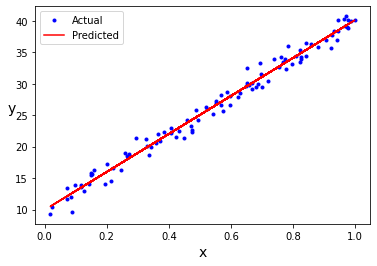

In [ ]:
X = np.hstack((np.ones((N, 1)), x)) 
y_pred = X.dot(theta_best)

plt.plot(x, y, 'b.', label = 'Actual')
plt.plot(x, y_pred, 'r-', label = 'Predicted')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

&#x270d; Use the best parameter theta to make predictions over new data.

In [ ]:
x_new = np.array([[0.1], [0.7]])
X_new = np.c_[np.ones((2, 1)), x_new] 

y_pred = X_new.dot(theta_best)
y_pred

array([[12.95471343],
       [31.07019311]])

&#x270d; Plot the new data according to the prediction

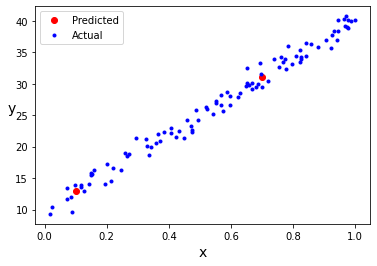

In [ ]:
plt.plot(x_new, y_pred, "ro", label = 'Predicted')
plt.plot(x, y, "b.", label = 'Actual')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

### Linear regression with gradient descent <a id="LR_gradient_desc"></a>

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

&#x270d; Implement the gradient descent algorithm in order to estimate the parameter theta and display it.

In [ ]:
eta = 0.005 # Set learning rate
n_iterations = 500000 # Set number of iterations
theta = np.random.randn(2,1) # Initialize theta

X = np.hstack((np.ones((N, 1)), x)) 

for iteration in range(n_iterations):
    
    gradients = 2/N * X.T.dot(X.dot(theta) - y)
    
    theta = theta - eta * gradients
    
print('Estimated theta\n', theta)

Estimated theta
 [[10.1689916 ]
 [29.60322324]]


&#x270d; Plot the cost function versus training iterations

Estimated theta
 [[ 9.92275383]
 [30.18500202]]


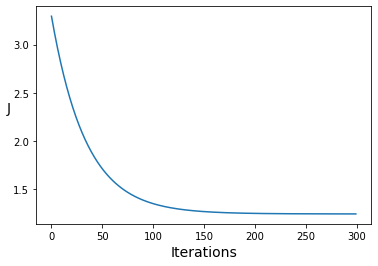

In [ ]:
eta = 0.75 # Set learning rate
n_iterations = 500 # Set number of iterations
theta = np.random.randn(2,1) # Initialize theta

J = []
for iteration in range(n_iterations):
    
    y_pred = X.dot(theta)
    J.append(sum((y - X.dot(theta))**2)/len(y))
    
    gradients = 2/N * X.T.dot(X.dot(theta) - y)

    theta = theta - eta * gradients
    
print('Estimated theta\n', theta)

plt.plot(J[200:])
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('J', rotation = 0, fontsize = 14)
plt.show()

&#x270d; Measure performance of the linear regression model using the following metrics:

1. Mean Absolute Error (MAE)
$$
\text{MAE} = \frac{1}{N} \sum_{n=1}^{N} {\left|{y_n - \hat{y}_n}\right|}
$$

In [ ]:
mae_sum = 0
for Xn, yn in zip(X, y):
    y_pred = Xn.dot(theta)
    mae_sum += abs(yn - y_pred)
mae = mae_sum/len(y)
print('MAE:', mae)

MAE: [0.82964148]


2. Mean Square Error (MSE)
$$
\text{MSE} = \frac{1}{N} \sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}
$$

In [ ]:
mse_sum = 0
for Xn, yn in zip(X, y):
    y_pred = Xn.dot(theta)
    mse_sum += (yn - y_pred)**2
mse = mse_sum/len(y)
print('MSE:', mse)

MSE: [1.08811502]


3. Mean Absolute Percentage Error (MAPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left|\frac{y_n - \hat{y}_n}{y_n}\right|}
$$

In [ ]:
mape_sum = 0
for Xn, yn in zip(X, y):
    y_pred = Xn.dot(theta)
    mape_sum += abs((yn - y_pred)/yn)
mape = mape_sum*100/len(y)
print('MAPE:', mape)

MAPE: [3.66211821]


4. Mean Percentage Error (MPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left(\frac{y_n - \hat{y}_n}{y_n}\right)}
$$

In [ ]:
mpe_sum = 0
for Xn, yn in zip(X, y):
    y_pred = Xn.dot(theta)
    mpe_sum += (yn - y_pred)/yn
mpe = mpe_sum*100/len(y)
print('MPE:', mpe)

MPE: [-0.41395438]


5. R squared
$$
R^2 = 1 - \frac{\sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}}{\sum_{n=1}^{N} {\left({y_n - \bar{y}}\right)^2}}
$$ where $\bar{y} = \frac{1}{N} \sum_{n=1}^{N} {y_n}$.

In [ ]:
y_pred = X.dot(theta)
ss_res = sum((y - y_pred)**2)
ss_tot = sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot
print('R2:', r2)

R2: [0.98372634]


### Linear regression with scikit-learn<a id="LR_scikitlearn"></a>

In this part, you can use linear regression implemented in linear model of sklearn package.

&#x270d; Calculate the regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print('Intercept: \n', lin_reg.intercept_)
print('Coefficient(s): \n', lin_reg.coef_)

y_pred = lin_reg.predict(x)

Intercept: 
 [10.17183153]
Coefficient(s): 
 [[29.7646589]]


&#x270d; Measure r2 score

In [ ]:
print('r2 score: \n', lin_reg.score(x, y))

r2 score: 
 0.9871377175737793


## Polinomial Regression <a id="poly_reg"></a>

You can actually use a linear model to fit a nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

### Data example <a id="poly_data"></a>

Let's start with generating a sample data.

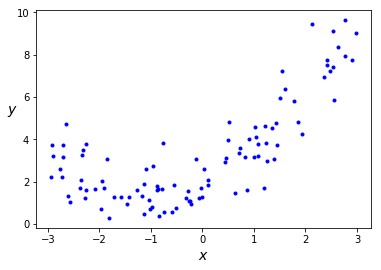

In [ ]:
N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

### Regression with polynomial features transformation <a id="reg_poly"></a>

We can use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (see [here]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for further information).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias=False)
X_poly = poly.fit_transform(X)

print('X_poly shape:', X_poly.shape)

X_poly shape: (100, 2)


$X_{poly}$ now contains the original feature of $X$ plus the square of this feature. 

&#x270d; Fit a linear regression model to this extended training data and display the intercept of linear regression and the coefficient.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.99282942] [[1.04850104 0.48466856]]


9) Plot the prediction along with data

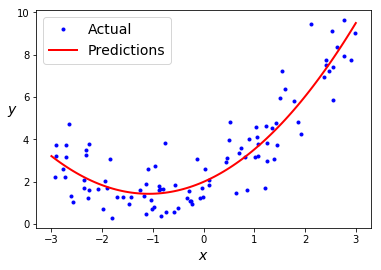

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.", label = 'Actual')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Note that, if you perform high-degree Polynomial Regression, you will likely fit the training data much better than
with a plain Linear Regression. 

### Underfitting vs. Overfitting <a id="under_over_fitting"></a>

&#x270d; Applies a 200-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nddegree polynomial).


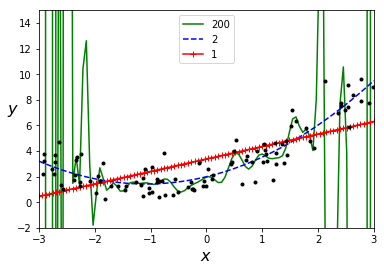

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for degree, style in ((200, "g-"), (2, "b--"), (1, "r-+")):
    polynomial_features = PolynomialFeatures(degree= degree, include_bias= False)
    standard_scaler = StandardScaler()
    linear_regression = LinearRegression()
    
    polynomial_regression = Pipeline([("poly_features", polynomial_features),
            ("std_scaler", standard_scaler),
            ("lin_reg", linear_regression)])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree))

plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="best")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-3, 3, -2, 15])
plt.show()

Notice how the 200-degree polynomial model moves to get as close as possible to training instances. Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.

## Summary <a id='summary'></a>

- In this project, we learned how to implement a linear regression model using:
    - Analytical solution
    - Gradient descent approach
    - Scikit-learn
- We also learned about polynomial regression model and how to use it along with a linear regression model for a non-linear data.